In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)]
max_features = ['auto', 'sqrt']
max_depth = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [3]:
df = pd.read_csv("experiment result.csv")
df = df[np.abs(df['max_slider']) > 50]
df = df.iloc[:, 11:]
y = df.iloc[:, 0] > 0
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [4]:
print(np.sum(y))
print(len(y) - np.sum(y))

620
487


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   44.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [6]:
np.mean(rf_random.predict(X_test) == y_test)

0.6775956284153005

In [7]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver':['liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg, grid, cv=3)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [8]:
np.mean(logreg_cv.predict(X_test) == y_test)

0.680327868852459

In [9]:
shader_names = ['Ambient Occlusion', 'Bloom', 'Chromatic Aberration', 'Contact Shadows',
       'Fog', 'Micro Shadowing', 'Motion Blur', 'Reflection Probe',
       'Screen Space Reflection', 'Screen Space Refraction', 'Tone Mapping',
       'Vignette', 'White Balance']

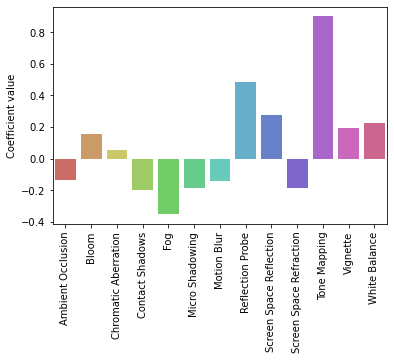

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {
        'x': shader_names,
        'y': logreg_cv.best_estimator_.coef_[0]
    }
)
sns.barplot(x = "x", y = "y", palette = 'hls', data = df)
plt.xticks(rotation=90)
plt.ylabel("Coefficient value")
plt.xlabel("")

plt.show()

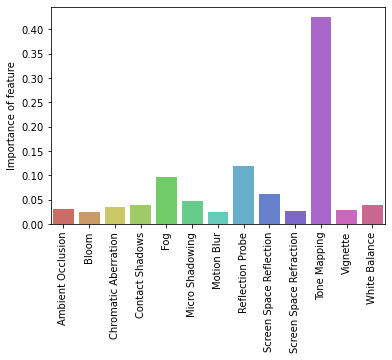

In [11]:
df = pd.DataFrame(
    {
        'x': shader_names,
        'y': rf_random.best_estimator_.feature_importances_
    }
)
sns.barplot(x = "x", y = "y", palette = 'hls', data = df)
plt.xticks(rotation=90)
plt.ylabel("Importance of feature")
plt.xlabel("")
plt.show()

In [12]:
np.corrcoef(rf_random.best_estimator_.feature_importances_, np.abs(logreg_cv.best_estimator_.coef_[0]))

array([[1.        , 0.95832617],
       [0.95832617, 1.        ]])

In [13]:
df = pd.DataFrame({
        'x': shader_names,
        'rf': np.round(rf_random.best_estimator_.feature_importances_, 3),
        'log': np.round(logreg_cv.best_estimator_.coef_[0], 3)
    }
)
df

,x,rf,log
0,Ambient Occlusion,0.031,-0.134
1,Bloom,0.025,0.157
2,Chromatic Aberration,0.035,0.052
3,Contact Shadows,0.039,-0.197
4,Fog,0.096,-0.352
5,Micro Shadowing,0.047,-0.183
6,Motion Blur,0.025,-0.139
7,Reflection Probe,0.120,0.483
8,Screen Space Reflection,0.062,0.274
9,Screen Space Refraction,0.026,-0.188
